<a href="https://colab.research.google.com/github/ione96/NLP_learning/blob/main/4_part_semantics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nlpia

In [8]:
# искусственно созданная тематическая модель
import numpy as np
topic = {}
tfidf = dict(list(zip('cat dog apple lion NYC love'.split(), np.random.rand(6))))
topic['petness'] = (.3 * tfidf['cat'] + 
                    .3 * tfidf['dog'] +
                    0 * tfidf['apple'] +
                    0 * tfidf['lion'] +
                    .2 * tfidf['NYC'] +
                    .2 * tfidf['love'] )
topic['animalness'] = (.1 * tfidf['cat'] + 
                    .1 * tfidf['dog'] +
                    .1 * tfidf['apple'] +
                    .5 * tfidf['lion'] +
                    .1 * tfidf['NYC'] +
                    .1 * tfidf['love'] )
topic['cityness'] = (0 * tfidf['cat'] + 
                    .1 * tfidf['dog'] +
                    .2 * tfidf['apple'] +
                    .1 * tfidf['lion'] +
                    .5 * tfidf['NYC'] +
                    .1 * tfidf['love'] )
print('topic=', topic) # ценность слов для каждой темы
word_vector = {}
word_vector['cat'] = .3*topic['petness'] + \
                     .1*topic['animalness'] + \
                     0*topic['cityness']
word_vector['dog'] = .3*topic['petness'] + \
                     .1*topic['animalness'] + \
                     .1*topic['cityness']
word_vector['apple'] = 0*topic['petness'] + \
                     .1*topic['animalness'] + \
                     .2*topic['cityness']
word_vector['lion'] = 0*topic['petness'] + \
                     .5*topic['animalness'] + \
                     .1*topic['cityness']
word_vector['NYC'] = .2*topic['petness'] + \
                     .1*topic['animalness'] + \
                     .5*topic['cityness']
word_vector['love'] = .2*topic['petness'] + \
                     .1*topic['animalness'] + \
                     .1*topic['cityness']
print('word_vector=', word_vector) # ценность темы для каждого слова

# LDA-модель 
#набор данных СМС-спама
import pandas as pd  
from nlpia.data.loaders import get_data   
pd.options.display.width = 120
sms =get_data('sms-spam')
index = ['sms{}{}'.format(i,'!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
sms = pd.DataFrame(sms.values, columns=sms.columns, index=index)
sms['spam'] = sms.spam.astype(int)
print('количество смс: ', len(sms))
print('количество спам: ',sms.spam.sum())
print(sms.head(6))      

#tfdfd модель
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()
print('кол-во слов в словаре: ',tfidf_docs.shape)
print('количество спам: ', sms.spam.sum())

# определение центроид
mask = sms.spam.astype(bool).values
spam_centroid = tfidf_docs[mask].mean(axis=0)
ham_centroid = tfidf_docs[~mask].mean(axis=0)
print('центроид спама: ', spam_centroid.round(2))
print('центроид не спама: ', ham_centroid.round(2))
spamminess_score = tfidf_docs.dot(spam_centroid - ham_centroid)
print('расстояние между центроидами: ', spamminess_score.round(2))

# оценка спама по шкале [0-1]
from sklearn.preprocessing import MinMaxScaler
sms['lda_score'] = MinMaxScaler().fit_transform(spamminess_score.reshape(-1,1))
sms['lda_predict'] = (sms.lda_score > .5).astype(int)
print(sms['spam lda_predict lda_score'.split()].round(2).head(6))
print('точность LDA предсказаний: ', (1. - (sms.spam - sms.lda_predict).abs().sum() / len(sms)).round(3))
from pugnlp.stats import Confusion
print('ошибки LDA:\n', Confusion(sms['spam lda_predict'.split()]))


topic= {'petness': 0.5344183017706838, 'animalness': 0.23936184245158168, 'cityness': 0.3357240545879817}
word_vector= {'cat': 0.18426167477636332, 'dog': 0.2178340802351615, 'apple': 0.09108099516275452, 'lion': 0.15325332668458902, 'NYC': 0.29868187189328577, 'love': 0.1643922500580931}
количество смс:  4837
количество спам:  638
       spam                                                    text
sms0      0  Go until jurong point, crazy.. Available only in bu...
sms1      0                           Ok lar... Joking wif u oni...
sms2!     1  Free entry in 2 a wkly comp to win FA Cup final tkt...
sms3      0       U dun say so early hor... U c already then say...
sms4      0  Nah I don't think he goes to usf, he lives around h...
sms5!     1  FreeMsg Hey there darling it's been 3 week's now an...
кол-во слов в словаре:  (4837, 9232)
количество спам:  638
центроид спама:  [0.06 0.   0.   ... 0.   0.   0.  ]
центроид не спама:  [0.02 0.01 0.   ... 0.   0.   0.  ]
расстояние между центр

/usr/local/lib/python3.7/dist-packages/pugnlp/stats.py:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/pugnlp/stats.py:504: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.__setattr__('_hist_labels', self.sum().astype(int))
/usr/local/lib/python3.7/dist-packages/pugnlp/stats.py:510: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self, '_hist_classes', self.T.sum())


In [7]:
# LSA-метод матрица тем-слов на основе 16 предложений
from nlpia.book.examples.ch04_catdog_lsa_3x6x16 import word_topic_vectors
print(word_topic_vectors.T.round(1))

from nlpia.book.examples.ch04_catdog_lsa_sorted import lsa_models, prettify_tdm
bow_svd, tfidf_svd = lsa_models()
print('\n корпус 11 предложений 6 слов:\n', prettify_tdm(**bow_svd))
tdm = bow_svd['tdm']
print(tdm)

# U- матрица - левые сингулярные векторы
import numpy as np
U, s, Vt = np.linalg.svd(tdm)
import pandas as pd
print('\nU-матрица:\n',pd.DataFrame(U, index=tdm.index).round(2))

#S-матрица - сингулярные значения
s.round(1)
S = np.zeros((len(U), len(Vt)))
pd.np.fill_diagonal(S,s)
print('\nS-матрица:\n', pd.DataFrame(S).round(1))

#Vt-матрица - правые сингулярные векторы
print('\nVt-матрица:\n', pd.DataFrame(Vt).round(2))

err = []
for numdim in range(len(s),0, -1):
  S[numdim - 1, numdim - 1] = 0
  reconstructed_tdm = U.dot(S).dot(Vt)
  err.append(np.sqrt(((reconstructed_tdm - tdm).values.flatten() ** 2).sum() / np.product(tdm.shape)))
print('погрешность при отбрасывании тем: ', np.array(err).round(2))



100%|██████████| 263/263 [00:00<00:00, 178668.93it/s]

      cat  dog  apple  lion  nyc  love
top0 -0.6 -0.4    0.5  -0.3  0.4  -0.1
top1 -0.1 -0.3   -0.4  -0.1  0.1   0.8
top2 -0.3  0.8   -0.1  -0.5  0.0   0.1

 корпус 11 предложений 6 слов:
    cat dog apple lion nyc love                                             text
0              1        1                                 NYC is the Big Apple.
1              1        1                        NYC is known as the Big Apple.
2                       1    1                                      I love NYC!
3              1        1           I wore a hat to the Big Apple party in NYC.
4              1        1                       Come to NYC. See the Big Apple!
5              1                             Manhattan is called the Big Apple.
6    1                                  New York is a big city for a small cat.
7    1              1           The lion, a big cat, is the king of the jungle.
8    1                       1                               I love my pet cat.
9          


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


изображение лошади всегда направлено в "профиль" к нам, так чтобы информация не терялась


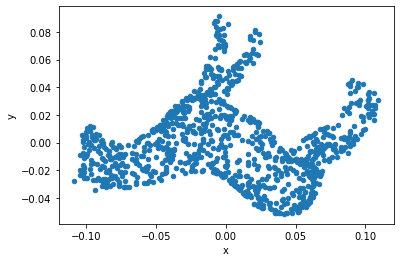


 набор СМС и спам: 
        spam                                               text
sms0      0  Go until jurong point, crazy.. Available only ...
sms1      0                      Ok lar... Joking wif u oni...
sms2!     1  Free entry in 2 a wkly comp to win FA Cup fina...
sms3      0  U dun say so early hor... U c already then say...
sms4      0  Nah I don't think he goes to usf, he lives aro...
sms5!     1  FreeMsg Hey there darling it's been 3 week's n...
кол-во СМС, токенов: (4837, 9232)
спам сообщения: 638

 СМС по темам: 
        topic0  topic1  topic2  ...  topic13  topic14  topic15
sms0    0.201   0.003   0.037  ...   -0.026   -0.014    0.031
sms1    0.404  -0.094  -0.078  ...    0.010    0.052   -0.030
sms2!  -0.030  -0.048   0.090  ...   -0.015   -0.065    0.037
sms3    0.329  -0.033  -0.035  ...   -0.007    0.050   -0.051
sms4    0.002   0.031   0.038  ...    0.031   -0.077   -0.045
sms5!  -0.016   0.059   0.014  ...    0.038   -0.006    0.025

[6 rows x 16 columns]

 веса с

In [6]:
#PCA на техмерных векторах
import pandas as pd
pd.set_option('display.max_columns', 6)
from sklearn.decomposition import PCA 
import seaborn
from matplotlib import pyplot as plt
from nlpia.data.loaders import get_data
df = get_data('pointcloud').sample(1000)
pca  = PCA(n_components=2)
df2d = pd.DataFrame(pca.fit_transform(df), columns=list('xy'))
df2d.plot(kind='scatter', x='x', y='y')
print('изображение лошади всегда направлено в "профиль" к нам, так чтобы информация не терялась')
plt.show()

from nlpia.data.loaders import get_data
pd.options.display.width = 120
sms = get_data('sms-spam')
index = ['sms{}{}'.format(i,'!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
sms.index = index
print('\n набор СМС и спам: \n', sms.head(6))

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs = pd.DataFrame(tfidf_docs)
tfidf_docs = tfidf_docs - tfidf_docs.mean()
print('кол-во СМС, токенов:', tfidf_docs.shape)
print('спам сообщения:', sms.spam.sum() )

from sklearn.decomposition import PCA
pca = PCA(n_components=16)
pca = pca.fit(tfidf_docs)
pca_topic_vectors = pca.transform(tfidf_docs)
columns = ['topic{}'.format(i) for i in range(pca.n_components)]
pca_topic_vectors = pd.DataFrame(pca_topic_vectors, columns=columns, index=index)
print('\n СМС по темам: \n', pca_topic_vectors.round(3).head(6))

coloumn_nums, terms = zip(*sorted(zip(tfidf.vocabulary_.values(), tfidf.vocabulary_.keys())))
weights = pd.DataFrame(pca.components_, columns=terms, index=['topic{}'.format(i) for i in range(16)])
pd.options.display.max_columns = 8
print('\n веса с метками для тем: \n', weights.head(4).round(3))

pd.options.display.max_columns = 12
deals = weights['! ;) :) half off free crazy deal only $ 80 %'.split()].round(3) * 100
print('\n тональности торговли: \n', deals.T.sum())

#усеченное SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=16, n_iter=100)
svd_topic_vectors = svd.fit_transform(tfidf_docs.values)
svd_topic_vectors = pd.DataFrame(svd_topic_vectors, columns=columns, index=index)
print('\n 16 тем с наибольшей дисперсией, с помощью усеченного SVD: \n', svd_topic_vectors.round(3).head(6))

#косинусный коэффициент сходства
import numpy as np
svd_topic_vectors = (svd_topic_vectors.T / np.linalg.norm(svd_topic_vectors, axis=1)).T
print('\n косинусное сходство: \n', svd_topic_vectors.iloc[:10].dot(svd_topic_vectors.iloc[:10].T).round(1))

#Латентное размещение Дирихле LDiA
total_corpus_len = 0
for document_text in sms.text:
  total_corpus_len += len(casual_tokenize(document_text))
mean_document_len = total_corpus_len / len(sms)
print('1 шаг: среднее число слов: ', round(mean_document_len, 2))



In [ ]:
#Латентное размещение Дирихле LDiA
#для шага 1 можно вычислить среднее число слов (или n-грамм)
#во всех мультимножествах слов документов из корпуса.
from nlpia.data.loaders import get_data
from nltk.tokenize.casual import casual_tokenize
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
sms = get_data('sms-spam')
index = ['sms{}{}'.format(i,'!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
sms.index = index
total_corpus_len = 0
for document_text in sms.text:
  total_corpus_len += len(casual_tokenize(document_text))
mean_document_len = total_corpus_len / len(sms)
print('1 шаг: среднее число слов: ', round(mean_document_len, 2))

#Вычисление векторов BOW в Scikit-Learn
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import casual_tokenize
np.random.seed(42)
counter = CountVectorizer(tokenizer=casual_tokenize)
bow_docs = pd.DataFrame(counter.fit_transform(raw_documents=sms.text).
                        toarray(), index=index)
column_nums, terms = zip(*sorted(zip(counter.vocabulary_.values(),
                                     counter.vocabulary_.keys())))
bow_docs.columns = terms
print('текст сообщения:\n', sms.loc['sms0'].text)
print('векторы BOW:\n', bow_docs.loc['sms0'][bow_docs.loc['sms0'] > 0].head())

from sklearn.decomposition import LatentDirichletAllocation as LDiA
ldia = LDiA(n_components=16, learning_method='batch')
ldia = ldia.fit(bow_docs)
print('темы, слова: ', ldia.components_.shape)

pd.set_option('display.width', 75)
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs = pd.DataFrame(tfidf_docs)
tfidf_docs = tfidf_docs - tfidf_docs.mean()
pca = PCA(n_components=16)
pca = pca.fit(tfidf_docs)
columns = ['topic{}'.format(i) for i in range(pca.n_components)]
components = pd.DataFrame(ldia.components_.T, index=terms, columns=columns)
print('распределение слов по темам: \n', components.round(2).head(3))
print('слова в теме3: \n', components.topic3.sort_values(ascending=False)[:10])

ldia16_topic_vectors = ldia.transform(bow_docs)
ldia16_topic_vectors = pd.DataFrame(ldia16_topic_vectors, index=index, columns=columns)
print('распределение СМС по темам: \n', ldia16_topic_vectors.round(2).head())

# Ldia + LDA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_train, X_test, y_train, y_test = \
train_test_split(ldia16_topic_vectors, sms.spam, test_size=0.5, 
                 random_state=271828)
lda = LDA(n_components=1)
lda = lda.fit(X_train, y_train)
sms['ldia16_spam'] = lda.predict(ldia16_topic_vectors)
print('точность определения: ', round(float(lda.score(X_test, y_test)), 2))

# функция product для прохождения по всем парам и тройкам
#from itertools import product
#all_pairs = [(word1, word2) for (word1, word2) in \
#             product(word_list, word_list) if not word1 == word2]

#обобщенение LDiA и PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs = tfidf_docs - tfidf_docs.mean(axis=0)
X_train, X_test, y_train, y_test = \
train_test_split(ldia16_topic_vectors, sms.spam, test_size=0.5, 
                 random_state=271828)
lda = LDA(n_components=1)
lda = lda.fit(X_train, y_train)
print('точность тренеровочного набра: ', round(float(lda.score(X_train, y_train)), 3))
print('точность тестового набра: ', round(float(lda.score(X_test, y_test)), 3))

#32 темы LDiA
ldia32 = LDiA(n_components=32, learning_method='batch')
ldia32 = ldia32.fit(bow_docs)
print('Темы, слова: ', ldia32.components_.shape)
ldia32_topic_vectors = ldia32.transform(bow_docs)
columns32 = ['topic{}'.format(i) for i in range(ldia32.n_components)]
ldia32_topic_vectors = pd.DataFrame(ldia32_topic_vectors, index=index, 
                                    columns=columns32)
print('распределение СМС по 32 темы: \n', ldia32_topic_vectors.round(2).head())
# обучение LDA модели с 32-мерными векторами
X_train, X_test, y_train, y_test = \
train_test_split(ldia32_topic_vectors, sms.spam, test_size=0.5, 
                 random_state=271828)
lda = LDA(n_components=1)
lda = lda.fit(X_train, y_train)
sms['ldia32_spam'] = lda.predict(ldia32_topic_vectors)
print('количество измерений в векторах тем: ', X_train.shape)
print('точность тренеровочного набра: ', round(float(lda.score(X_train, y_train)), 3))
print('точность тестового набра: ', round(float(lda.score(X_test, y_test)), 3))



/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
/usr/local/lib/python3.7/dist-packages/pugnlp/tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/pugnlp/util.py:80: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/nlpia

1 шаг: среднее число слов:  21.35
текст сообщения:
 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
векторы BOW:
 ,            1
..           1
...          2
amore        1
available    1
Name: sms0, dtype: int64
темы, слова:  (16, 9232)
распределение слов по темам: 
    topic0  topic1  topic2  topic3  ...  topic12  topic13  topic14  topic15
!  184.03   15.00   72.22  394.95  ...    64.40   297.29    41.16    11.70
"    0.68    4.22    2.41    0.06  ...     0.07    62.72    12.27     0.06
#    0.06    0.06    0.06    0.06  ...     1.07     4.05     0.06     0.06

[3 rows x 16 columns]
слова в теме3: 
 !       394.952246
.       218.049724
to      119.533134
u       118.857546
call    111.948541
£       107.358914
,        96.954384
*        90.314783
your     90.215961
is       75.750037
Name: topic3, dtype: float64
распределение СМС по темам: 
        topic0  topic1  topic2  topic3  ...  topic12  topic13  topic14  topic1

In [5]:
#Доступные в sklearn попарные расстояния
#'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'braycurtis',
#'canberra', 'chebyshev', 'correlation', 'dice', 'hamming', 'jaccard',
#'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
#'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean',
#'yule'

#Оценки расстояния на основе подобия
#similarity = 1. / (1. + distance)
#distance = (1. / similarity) - 1

#Оценки расстояния и подобия в диапазоне 0 и 1
#similarity = 1. - distance
#distance = 1. - similarity

#Оценки расстояния и подобия косинусного коэффициента
#import math
#angular_distance = math.acos(cosine_similarity) / math.pi
#distance = 1. / similarity - 1.
#similarity = 1. - distance

# Линейный дискриминантный анализ
#LDA одномерная тематическая модель в классификации спамовых СМС
from nlpia.data.loaders import get_data
from nltk.tokenize.casual import casual_tokenize
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
sms = get_data('sms-spam')
index = ['sms{}{}'.format(i,'!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
sms.index = index
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs = pd.DataFrame(tfidf_docs)
tfidf_docs = tfidf_docs - tfidf_docs.mean()
lda = LDA(n_components=1)
lda = lda.fit(tfidf_docs, sms.spam)
sms['lda_spaminess'] = lda.predict(tfidf_docs)
print('количество ошибок', ((sms.spam - sms.lda_spaminess) ** 2.).sum() ** .5)
print('количество LDA СМС', (sms.spam == sms.lda_spaminess).sum())
print('количество СМС', len(sms))
#кросс-валидация
from sklearn.model_selection import cross_val_score
lda = LDA(n_components=1)
scores = cross_val_score(lda, tfidf_docs, sms.spam, cv=5)
print('Точность после кросс-валидации: {:.2f} (+/-{:.2f})'.format(scores.mean(), scores.std() * 2))
#треть набора данных для контроля
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
 train_test_split(tfidf_docs, sms.spam, 
                  test_size=0.33, random_state=271828)
lda = LDA(n_components=1)
lda.fit(X_train, y_train)
print('Точность при трети набора данных: ', lda.score(X_test, y_test).round(3))
#LSA  в сочетании с LDA
pca = PCA(n_components=16)
pca = pca.fit(tfidf_docs)
pca_topicvectors = pca.transform(tfidf_docs)
X_train, X_test, y_train, y_test = train_test_split(pca_topicvectors, sms.spam, test_size=0.3, random_state=271828)
lda = LDA(n_components=1)
lda.fit(X_train, y_train)
print('точность на тестовой модели: ',lda.score(X_test, y_test).round(3))
lda = LDA(n_components=1)
scores = cross_val_score(lda, pca_topicvectors, sms.spam, cv=10)
print('Точность LSA+LDA: {:.3f} (+/-{:.3f})'.format(scores.mean(), scores.std() * 2))


количество ошибок 0.0
количество LDA СМС 4837
количество СМС 4837
Точность после кросс-валидации: 0.77 (+/-0.02)
Точность при трети набора данных:  0.764
точность на тестовой модели:  0.966
Точность LSA+LDA: 0.960 (+/-0.020)
